In [2]:
import os.path as op
import os
# import sys
import numpy as np
import pandas as pd
import seaborn as sns
from fpdf import FPDF  

import mne
from mne.preprocessing import find_bad_channels_maxwell
import matplotlib.pyplot as plt
# from mne.time_frequency import psd_multitaper
from mne.preprocessing import annotate_muscle_zscore
from mne.preprocessing import ICA
from mne.preprocessing import read_ica
import scipy.stats

## Preprocessing

In [3]:
# data_path =  'D:\projects\WM_GRID\DATA\mg99a'
# cal_path = 'D:\projects\WM_GRID\DATA\ctc'
# sss_path = 'D:\projects\WM_GRID\DATA\sss'

rawdir =  '/data/pt_02774/memory_grid/'


subject_list = ['mg15','mg16','mg17','mg18','mg19','mg20','mg21','mg22','mg23','mg24','mg25','mg26','mg27', 'mg28','mg30','mg31','mg32','mg33','mg34','mg36','mg37','mg38','mg40','mg41','mg44','mg45','mg46','mg47']
# subject_list = ['mg28','mg30','mg31','mg32','mg33','mg34','mg36','mg38','mg40','mg41','mg44','mg45','mg46','mg47']
# subject_list = ['mg37'] # 'mg29','mg39','mg42'
subject_list = ['mg41']
subject_list = ['mg31']

In [4]:
# %load 06-make_epochs_2.py
"""
====================
06. Make epochs
====================

Open issues:
    - baseline correction -> removed
    - apply (SSP) projections?
    - separate MEG and EEG in two different FIF files?
    - Exp.2: separate VG and replay in two different files?
    - detrand required for EEG data: when do we apply it? to epochs or to events?
    - remove peak-to-peak rejection?
    
"""


def run_epochs_2():

    # stdout_obj = sys.stdout                 # store original stdout 
    # sys.stdout = open(op.join(out_path,     # open log file
    #                            os.path.basename(__file__) + "_%s.txt" % (site_id+subject_id)),'w')
    
    # Prepare PDF report
    pdf = FPDF(orientation="P", unit="mm", format="A4")
    
    print("Processing subject: %s" % subject_id)
    
    # Create empty lists
    raw_list = list()
    events_list = list()
    # metadata_list = list()
    
    print("Processing subject: %s" % subject_id)
    run = 0
    for file_name in file_names:
        run = run + 1
        print("  File: %s" % file_name)
        
        # Read raw data
        raw_fname_in = op.join(out_path,
                               file_name + '_ica.fif')
        raw_tmp = mne.io.read_raw_fif(
            raw_fname_in, 
            preload=True, 
            verbose='error')
        
        # Read events
        events_tmp = mne.read_events(op.join(out_path,
                                             file_name + '-eve.fif'))                           
        # Read metadata
        # metadata_tmp = pd.read_csv(op.join(out_path,
        #                                   file_name + '-meta.csv'))
        
        # Append read data to list
        raw_list.append(raw_tmp)
        events_list.append(events_tmp)
        # metadata_list.append(metadata_tmp)

    # Concatenate raw instances as if they were continuous
    raw, events = mne.concatenate_raws(raw_list,
                                       events_list=events_list)
    del raw_list
    
    # Concatenate metadata tables
    # metadata = pd.concat(metadata_list)
    # metadata.to_csv(op.join(out_path,
    #                    file_name[0:14] + 'ALL-meta.csv'),
    #                index=False)
    
    # Set reject criteri
    
    # Select sensor types
    #picks = mne.pick_types(raw.info,
    #                       meg = True,
    #                       stim = True)
    
    # Epoch raw data
    epochs = mne.Epochs(raw,
                        events, 
                        events_id,
                        tmin, tmax,
                        baseline=None,
                        proj=True,
                        picks='all',
                        detrend=1,
                        reject_by_annotation = False,
                        verbose=True)
    epochs_resampled=epochs.load_data().copy().resample(200)
    
    # epochs.metadata = metadata
    
    del raw
    
    # Add metadata
    # epochs.metadata = metadata
    
    # Drop bad epochs based on peak-to-peak magnitude
    # epochs.drop_bad()
    
    # Plot percentage of rejected epochs per channel
    # fig1 = epochs.plot_drop_log()
    # fname_fig1 = op.join(out_path,
    #                    '07_rAll_epoch_drop.png')
    # fig1.savefig(fname_fig1)
    # plt.close()
    
    '''
    # Add figure to report
    pdf.add_page()
    pdf.set_font('helvetica', 'B', 16)
    pdf.cell(0, 10, file_name)
    pdf.ln(20)
    pdf.set_font('helvetica', 'B', 12)
    pdf.cell(0, 10, 'Percentage of rejected epochs', 'B', ln=1)
    pdf.image(fname_fig1, 0, 45, pdf.epw)
    '''
    # Plot evoked by epoch
    fig1 = epochs.plot(picks='meg',
                      title='meg',
                      n_epochs=10)
    fname_fig1 = op.join(out_path,
                        '07_rAll_epoch_evk.png')
    fig1.savefig(fname_fig1)
    plt.close(fig1)
    
    fig2 = epochs_resampled.plot(picks='meg',
                      title='meg',
                      n_epochs=10)
    fname_fig2 = op.join(out_path,
                        '07_rAll_epoch_evk_resample.png')
    fig2.savefig(fname_fig2)
    plt.close(fig2)
    
    '''
    # Add figures to report
    pdf.ln(120)
    pdf.cell(0, 10, 'Epoched data', 'B', ln=1)
    pdf.image(fname_fig2, 0, 175, pdf.epw)
    '''
    # Count the number of epochs defined by different events
    # Save epoched data
    epochs.save(op.join(out_path,
                        file_names[0][0:13] + 'ALL_epo.fif'),                           
                    overwrite=True)
    epochs_resampled.save(op.join(out_path,
                        file_names[0][0:13] + 'ALL_epo_rsample.fif'),                           
                    overwrite=True)
    
    # Save report  #TODO: add note about removed ICs
    # pdf.output(op.join(out_path,
    #                   'run_epochs' + '-report.pdf'))
    
    # sys.stdout.close()      # close log file
    # sys.stdout = stdout_obj # restore command prompt




Processing subject: mg31
Processing subject: mg31
  File: mg31a01
  File: mg31a02
  File: mg31a03
  File: mg31a04
  File: mg31a05
  File: mg31a06
  File: mg31b07
  File: mg31b08
  File: mg31b09
  File: mg31b10
  File: mg31b11
  File: mg31b12
Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 720 events and 8701 original time points ...
0 bad epochs dropped


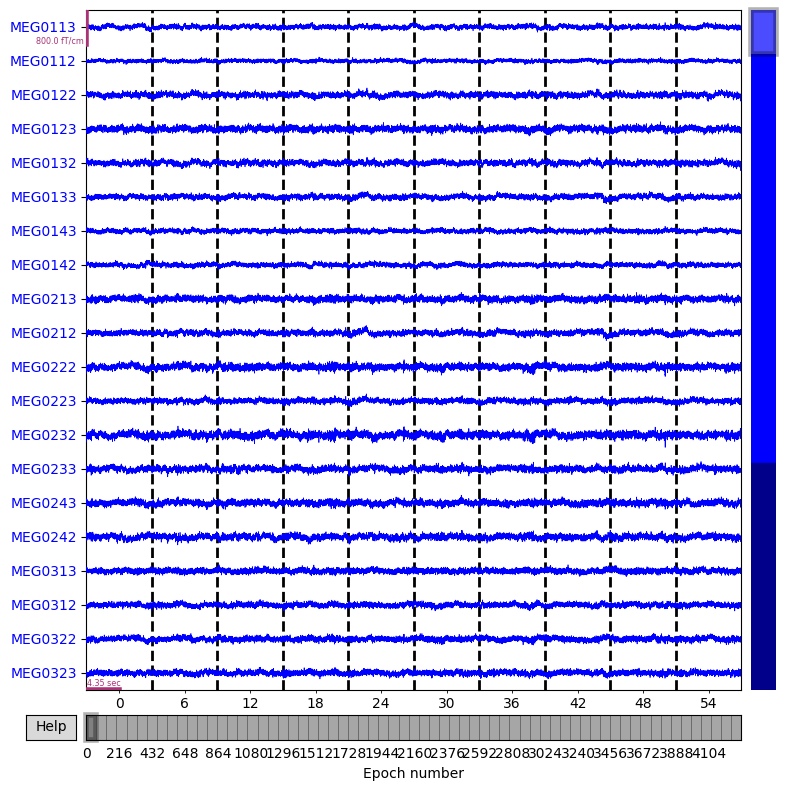

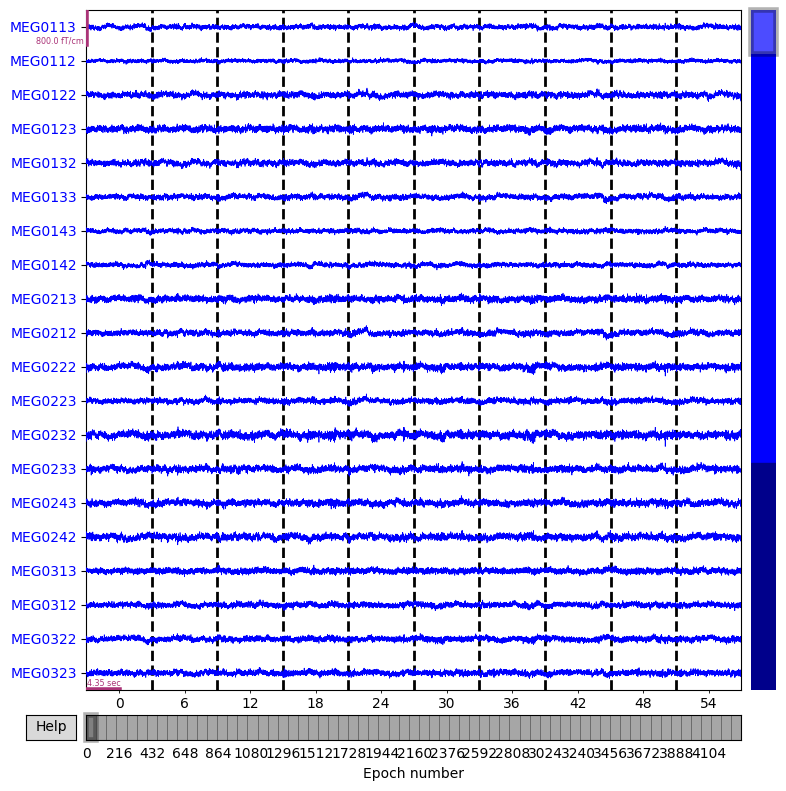

Overwriting existing file.
Splitting into 4 parts
Overwriting existing file.


/tmp/ipykernel_3610/3556047192.py:146: RuntimeWarning: This filename (/data/pt_02774/memory_grid/mg31/mg31a01ALL_epo_rsample.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_resampled.save(op.join(out_path,


In [6]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""

for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================
    # Set filename based on experiment number
    data_path = os.path.join(rawdir,subject_id)
    
    if subject_id == 'mg37':
        
        file_exts = ['%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12',
                     '%sc01',
                     '%sc02',
                     '%sc03',
                     '%sc04',
                     '%sc05',
                     '%sc06']

    else:
        file_exts = ['%sa01',
                     '%sa02',
                     '%sa03',
                     '%sa04',
                     '%sa05',
                     '%sa06',
                     '%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12']#,

    file_names = [f % (subject_id) for f in file_exts]



    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(data_path)
    if not op.exists(out_path):
        os.mkdir(out_path)


    # =============================================================================
    # EPOCHING SETTINGS
    # =============================================================================

    # Set timewindow
    tmin = -0.5
    tmax = 8.2

    # Epoch rejection criteria
    reject_meg = dict(grad=4000e-13,    # T / m (gradiometers)
                      mag=4e-12         # T (magnetometers)
                      )

    # Set epoching event ids

    events_id = 101


    # =============================================================================
    # TIME-FREQUENCY REPRESENTATION SETTINGS
    # =============================================================================
    
    baseline_w = [-0.5, -0.25]     #only for plotting
    freq_band = 'both' #can be 'low', 'high' or 'both'

    # =============================================================================
    # RUN
    # =============================================================================
    
    #apply_ica(meg_ica_eog = meg_ica_eog,
    #        meg_ica_ecg = meg_ica_ecg)

    # run_epochs()
    run_epochs_2()

In [9]:
epochs.info()

NameError: name 'epochs' is not defined

In [ ]:
    subject_id=subject_list[0]
    file_exts = ['%sa01',
                     '%sa02',
                     '%sa03',
                     '%sa04',
                     '%sa05',
                     '%sa06',
                     '%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12']#,

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(data_path, "out_path")
    if not op.exists(out_path):
        os.mkdir(out_path)


    # =============================================================================
    # MAXWELL FILTERING SETTINGS
    # =============================================================================

    # Set filtering method
    method='sss'
    if method == 'tsss':
        st_duration = 10
    else:
        st_duration = None


    # =============================================================================
    # FILTERING AND DOWNSAMPLING SETTINGS
    # =============================================================================

    # Filter and resampling params
    l_freq = 1
    h_freq = 40
    sfreq = 200


    # =============================================================================
    # EPOCHING SETTINGS
    # =============================================================================

    # Set timewindow
    tmin = -0.5
    tmax = 8.1

    # Epoch rejection criteria
    reject_meg = dict(grad=4000e-13,    # T / m (gradiometers)
                      mag=4e-12         # T (magnetometers)
                      )

    # Set epoching event ids

    events_id = 101



    # =============================================================================
    # ICA SETTINGS
    # =============================================================================

    ica_method = 'fastica'
    n_components = 0.99
    max_iter = 800
    random_state = 1688


    # =============================================================================
    #  FACTOR AND CONDITIONS OF INTEREST
    # =============================================================================

    
    # factor = 'Category'
    # conditions = ['face', 'object', 'letter', 'false']

        # factor = 'Relevance'
        # conditions = ['Relevant target','Relevant non-target','Irrelevant']


    # =============================================================================
    # TIME-FREQUENCY REPRESENTATION SETTINGS
    # =============================================================================

    baseline_w = [-0.5, -0.25]     #only for plotting
    freq_band = 'both' #can be 'low', 'high' or 'both'

    # =============================================================================
    # RUN
    # =============================================================================

    # meg_ica_eog,meg_ica_ecg = ica_choice[0],ica_choice[1]
    
    #apply_ica(meg_ica_eog = meg_ica_eog,
    #          meg_ica_ecg = meg_ica_ecg)
    run_epochs()

In [4]:
        
        raw_fname_in = op.join(out_path,
                               file_names[2] + '_ica.fif')
        raw_tmp = mne.io.read_raw_fif(
            raw_fname_in, 
            preload=True, 
            verbose='error')
        raw_tmp.filter(1, 50)
        # Read events
        events_tmp = mne.read_events(op.join(out_path,
                                             file_names[2] + '-eve.fif'))                           
        # Read metadata
        # metadata_tmp = pd.read_csv(op.join(out_path,
        #                                   file_name + '-meta.csv'))
        
        # Append read data to list

        # metadata_list.append(metadata_tmp)

    # Concatenate raw instances as if they were continuous
    
    
    # Concatenate metadata tables
    # metadata = pd.concat(metadata_list)
    # metadata.to_csv(op.join(out_path,
    #                    file_name[0:14] + 'ALL-meta.csv'),
    #                index=False)
    
    # Set reject criteria
        reject_meg = dict(grad=5000e-13,    # T / m (gradiometers)
                        mag=5e-12         # T (magnetometers)
                        )
        reject = reject_meg
        events_id=101
        tmin = -0.5
        tmax = 8.1
    
    # Select sensor types
    #picks = mne.pick_types(raw.info,
    #                       meg = True,
    #                       stim = True)
    
    # Epoch raw data
        picks = mne.pick_types(raw_tmp.info,
                            meg = True)
        epochs = mne.Epochs(raw_tmp,
                        events_tmp, 
                        events_id,
                        tmin, tmax,
                        baseline=None,
                        proj=True,
                        picks=picks,
                        detrend=1,
                        reject=reject,
                        reject_by_annotation=True,
                        verbose=True)
    
    # epochs.metadata = metadata
    

    
    # Add metadata
    # epochs.metadata = metadata
    
    # Drop bad epochs based on peak-to-peak magnitude
        epochs.drop_bad()

NameError: name 'out_path' is not defined

In [ ]:
raw_tmp.info

In [ ]:
file_name='mg99a01'
data_path =  'D:\projects\WM_GRID\DATA\mg99a'
raw_fname_in = op.join(data_path,
                        file_name + '.fif')
raw = mne.io.read_raw_fif(
            raw_fname_in, 
            preload=True, 
            verbose='error')

In [ ]:
raw.info['dev_head_t'] 

In [ ]:
file_name='mg99a01'
data_path =  'D:\projects\WM_GRID\DATA\mg99a'
out_path = op.join(data_path, "out_path")
raw_fname_in = op.join(out_path,
                        file_name + '_sss.fif')
raw = mne.io.read_raw_fif(
            raw_fname_in, 
            preload=True, 
            verbose='error')

In [ ]:
raw.info['dev_head_t'] 

In [ ]:
file_name='mg99a02'
data_path =  'D:\projects\WM_GRID\DATA\mg99a'
out_path = op.join(data_path)
raw_fname_in = op.join(out_path,
                        file_name + '.fif')
raw = mne.io.read_raw_fif(
            raw_fname_in, 
            preload=True, 
            verbose='error')

In [ ]:
raw.info['dev_head_t'] 